In [1]:
# import matplotlib
# matplotlib.use('Agg')    # must come before importing pyplot
# import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt

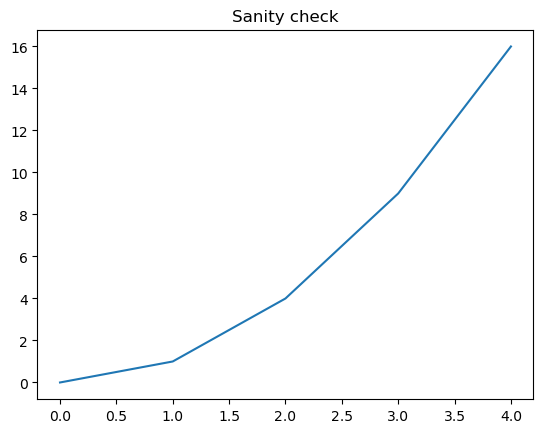

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([0,1,2,3,4], [0,1,4,9,16])
plt.title("Sanity check")
plt.show()

In [2]:
from fnn import microns
from numpy import full, concatenate


In [3]:
# from caveclient import CAVEclient
# client = CAVEclient()
# client.auth.setup_token(make_new=True)

# client.auth.save_token(token='a6ca3f9ba9c286bf2d9bf3278d1c08bb')

In [3]:
from caveclient import CAVEclient
datastack_name = 'minnie65_public'
client = CAVEclient(datastack_name)

# Show the description of the datastack
client.info.get_datastack_info()['description']

# set materialization version, for consistency
client.version = 1300 # current public as of 1/13/2025

In [4]:
# Standard query
client.materialize.query_table('coregistration_manual_v4')


,id_ref,created_ref,valid_ref,volume,pt_supervoxel_id,pt_root_id,id,created,valid,target_id,session,scan_idx,unit_id,field,residual,score,pt_position,bb_start_position,bb_end_position
0,335649,2020-09-28 22:41:20.303372+00:00,t,295.861125,93747454767483710,864691135702330235,5491,2024-05-21 18:38:25.372047+00:00,t,335649,6,2,6883,6,7.41244,2.60806,"[210784, 182032, 22673]","[nan, nan, nan]","[nan, nan, nan]"
1,194144,2020-09-28 22:42:01.511773+00:00,t,213.307228,83542405709639148,864691135614842827,12542,2024-05-21 18:42:40.285576+00:00,t,194144,7,4,9575,6,8.55708,-0.71490,"[136400, 170640, 17951]","[nan, nan, nan]","[nan, nan, nan]"
2,194144,2020-09-28 22:42:01.511773+00:00,t,213.307228,83542405709639148,864691135614842827,15097,2024-05-21 18:42:41.703496+00:00,t,194144,8,5,8632,6,4.25055,7.87525,"[136400, 170640, 17951]","[nan, nan, nan]","[nan, nan, nan]"
3,517966,2020-09-28 22:41:48.288009+00:00,t,313.318932,107530794289274882,864691136966116814,12829,2024-05-21 18:42:40.443453+00:00,t,517966,7,5,1526,2,5.82370,4.16608,"[310944, 115888, 16752]","[nan, nan, nan]","[nan, nan, nan]"
4,293318,2020-09-28 22:45:23.572432+00:00,t,430.108180,90783515419343652,864691135430194992,18299,2024-05-21 18:42:43.440278+00:00,t,293318,9,4,8066,6,5.63758,8.91502,"[189472, 119296, 26037]","[nan, nan, nan]","[nan, nan, nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19176,262726,2020-09-28 22:40:53.163402+00:00,t,271.034778,89523268264453192,864691135993550529,14821,2024-05-21 18:42:41.551451+00:00,t,262726,8,5,7945,6,7.09036,4.02044,"[179920, 167104, 20924]","[nan, nan, nan]","[nan, nan, nan]"
19177,299152,2020-09-28 22:44:34.787046+00:00,t,264.902410,90227918047331899,864691136363154402,8333,2024-05-21 18:38:26.957169+00:00,t,299152,6,6,6654,6,9.37922,-0.73360,"[185168, 174208, 22967]","[nan, nan, nan]","[nan, nan, nan]"
19178,224188,2020-09-28 22:44:06.796036+00:00,t,217.948815,86915776304724899,864691134949221372,13894,2024-05-21 18:42:41.035589+00:00,t,224188,8,5,2091,2,2.73202,9.23278,"[161168, 138304, 19698]","[nan, nan, nan]","[nan, nan, nan]"
19179,260548,2020-09-28 22:44:59.140141+00:00,t,303.923036,89169225520073388,864691136725032701,5070,2024-05-21 18:38:25.135987+00:00,t,260548,6,2,4586,4,2.61740,11.04760,"[177360, 150528, 20753]","[nan, nan, nan]","[nan, nan, nan]"


In [5]:
# load the model and neuron ids of the MICrONS scan 8-5
model, ids = microns.scan(session=8, scan_idx=5)

In [6]:
# example 3-second video (3 x 30 frames @ 30 FPS, 144 height, 256 width)
frames = concatenate([
    full(shape=[30, 144, 256], dtype="uint8", fill_value=0),   # 1 second of black
    full(shape=[30, 144, 256], dtype="uint8", fill_value=128), # 1 second of gray
    full(shape=[30, 144, 256], dtype="uint8", fill_value=255), # 1 second of white
])

In [7]:
print(type(frames), frames.shape, frames.dtype)

<class 'numpy.ndarray'> (90, 144, 256) uint8


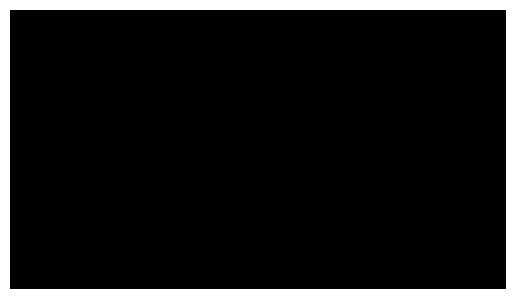

In [12]:
plt.imshow(frames[0,:,:], cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()   # now shows inline in the notebook

In [8]:
# predict the response of neurons to the 3-second video
response = model.predict(stimuli=frames)

In [9]:
print(ids.shape) # Nneurons * 3
print(frames.shape) # Nframes * height * width
print(response.shape) # Nframes * Nneurons

(9941, 3)
(90, 144, 256)
(90, 9941)


In [10]:
help(microns)

Help on package fnn.microns in fnn:

NAME
    fnn.microns

PACKAGE CONTENTS
    build
    load

FUNCTIONS
    download(url, file_path, chunk_size=8192, verbose=True)
        Parameters
        ----------
        url : str
            source url
        file_path : os.PathLike
            destination file path
        chunk_size : int
            size of the chunks (in bytes) to read
        verbose : bool
            display download progress
        
        Returns
        -------
        str
            MD5 checksum of downloaded file as a hexadecimal string
    
    scan(session, scan_idx, cuda=True, directory=None, verbose=True)
        Parameters
        ----------
        session : int
            scan session
        scan_idx : int
            scan index
        directory : os.PathLike | None
            directory for model parameters and metadata. defaults to current working directory
        verbose : bool
            display download progress
        cuda : bool
            

In [34]:
help(model.predict)

Help on method predict in module fnn.model.networks:

predict(stimuli, perspectives=None, modulations=None) method of fnn.model.networks.Visual instance
    Parameters
    ----------
    stimuli : Iterable[2D|3D|4D array]
        T x [H, W] (singular) | T x [H, W, C] (singular) | T x [N, H, W, C] (batch) --- dtype=uint8
    perspectives : Iterable[1D|2D array] | None
        T x [P] (singular) | T x [N, P] (batch) --- dtype=float
    modulations : Iterable[1D|2D array] | None
        T x [M] (singular) | T x [N, M] (batch) --- dtype=float
    training : bool
        training or inference mode
    reset : bool
        reset or continue state
    
    Returns
    -------
    2D array | 3D array
        [T, U] (singular input) | [T, N, U] (batch input) -- dtype=float

